# NLP + CV Project - Search Animals
Given a dataset of animals, write code that allows you to search with text for images of animals that match a description and returns the best image or images from the dataset based on the input query. It is up to you what characteristics about an animal you want to make searchable (e.g. number of legs, color, etc). No pressure to make a lot of characteristics searchable - as many or as few as you want.

You should test your model to make sure that its accurately images based on your descriptions.

In [199]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import random, os, cv2, torch
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from transformers import BertTokenizer, BertModel

#Arnav
image_folder_path = 'animals_picked'
image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

## Make a dataframe containing the images (one row for each image)

In [200]:
df = pd.DataFrame({'filename':image_files})
print(df.head())

#Matthew

         filename
0  0e6a8744de.jpg
1  72fab2ffef.jpg
2  9a5f7038d8.jpg
3  3321ec48a8.jpg
4  0056a7d78a.jpg


## Write a function to get the top animal predicted for each image and save it in the dataframe

In [201]:
model = ResNet50(weights = 'imagenet')

def predict_animal(photo):
    img = image.load_img(f"animals_picked/{photo}", target_size = (224, 224)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    preds = model.predict(img_array)
    pred_class = decode_predictions(preds, top=4)[0][0][1]

    return pred_class.replace('_', ' ')

# predict_animal(df['filename'][0]) # ⬅️ DEBUGGING
df['predicted_animal'] = df['filename'].apply(predict_animal)

#Varun

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

In [202]:
df

,filename,predicted_animal
0,0e6a8744de.jpg,hook
1,72fab2ffef.jpg,sorrel
2,9a5f7038d8.jpg,ice bear
3,3321ec48a8.jpg,tabby
4,0056a7d78a.jpg,leaf beetle
...,...,...
85,4e873fbf49.jpg,fly
86,0a8b92e56d.jpg,hen
87,60e6114a8a.jpg,monarch
88,81fc660d0f.jpg,nematode


## Write a function to get a description of the features of the predicted animal and save as a column

In [203]:
import warnings
warnings.filterwarnings('ignore')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_animal_features(animal):
    inputs = tokenizer(animal, return_tensors="pt")
    outputs = bert_model(**inputs)
    description_embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return description_embedding

df['description_embedding'] = df['predicted_animal'].apply(get_animal_features)

#Karthik

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

## Write a function to convert each description into a vector (each individual row)

In [204]:
def description_to_vector(query):
    inputs = tokenizer(query, return_tensors='pt')
    outputs = bert_model(**inputs)
    query_embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return query_embedding

#Matthew

## Apply function to each row of the description column to get embeddings

In [205]:
df['description_vector'] = df['predicted_animal'].apply(description_to_vector)

#Arnav

## Write code to convert a query into a vector 

In [206]:
def query_to_vector(query):
    inputs = tokenizer(query, return_tensors='pt')
    outputs = bert_model(**inputs)
    query_embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return query_embedding
    #Varun

## Use KNN to find the most similar story to the query

In [207]:
def find_most_similar_image(query):
    query_vector = query_to_vector(query)
    similarities = cosine_similarity(query_vector, np.vstack(df['description_vector'].values)).flatten()
    most_similar_index = similarities.argmax()
        # This is where the algorithm pretends to know what it's doing.

    # print(f"Most similar image: {df.iloc[most_similar_index]['filename']}")
    return df.iloc[most_similar_index]['filename'] #perfect match like 8% of the time

    #Karthik

## Return the image based on the query 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
The best match for a big panda is 2aae9ae91c.jpg, which is a giant panda


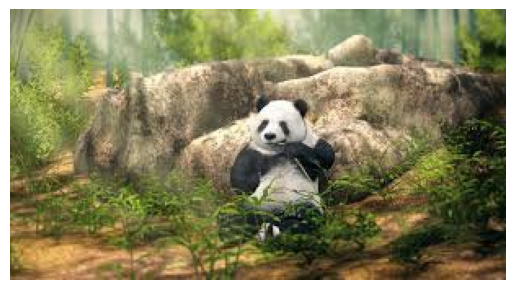

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The best match for a crane is 61d384ee68.jpg, which is a crane


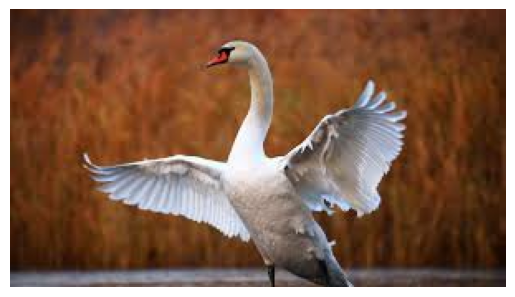

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
The best match for a small bird is 02d0664b65.jpg, which is a hummingbird


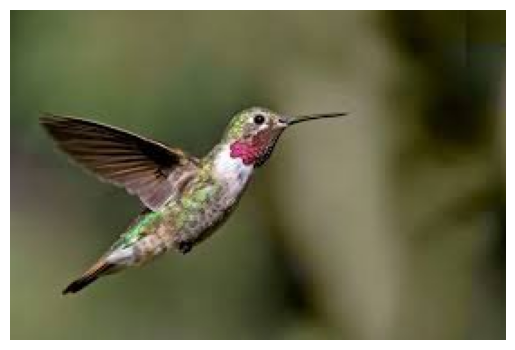

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
The best match for a small grasshopper is 0d4466627b.jpg, which is a grasshopper


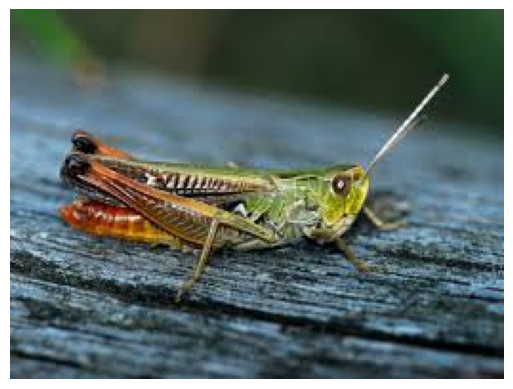

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
The best match for crab flying is 3c63c57a72.jpg, which is a rock crab


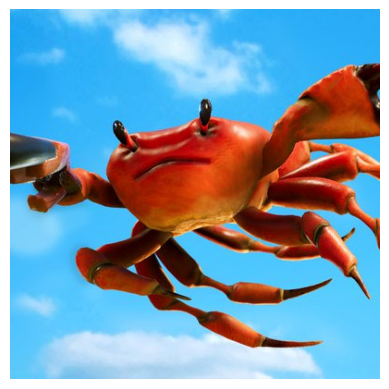

In [208]:
from colorama import Fore

#  █▀▀█ █  █ █▀▀ ▀▀█▀▀ █▀▀█ █▀▄▀█ 　 ▀█▀ █▀▀▄ █▀▀█ █  █ ▀▀█▀▀ █▀▀ 
#  █    █  █ ▀▀█   █   █  █ █ ▀ █ 　  █  █  █ █  █ █  █   █   ▀▀█ 
#  █▄▄█  ▀▀▀ ▀▀▀   ▀   ▀▀▀▀ ▀   ▀ 　 ▄█▄ ▀  ▀ █▀▀▀  ▀▀▀   ▀   ▀▀▀

# query = input('Enter a description of an animal: ')
# best_match = find_most_similar_image(query)

# print(f"The best match for {Fore.YELLOW + query + Fore.WHITE} is {Fore.GREEN + best_match + Fore.WHITE}, which is a {Fore.BLUE + predict_animal(best_match) + Fore.WHITE}")
# img = Image.open(f'animals_picked/{best_match}')
# plt.imshow(img)
# plt.axis('off')


#  ▀▀█▀▀ █▀▀ █▀▀ ▀▀█▀▀ █▀▀ █▀▀▄ 　 █▀▀█ █  █ █▀▀ █▀▀█ ▀ █▀▀ █▀▀ 
#    █   █▀▀ ▀▀█   █   █▀▀ █  █ 　 █  █ █  █ █▀▀ █▄▄▀ █ █▀▀ ▀▀█ 
#    █   ▀▀▀ ▀▀▀   ▀   ▀▀▀ ▀▀▀  　 ▀▀█▄  ▀▀▀ ▀▀▀ ▀ ▀▀ ▀ ▀▀▀ ▀▀▀
                                                                                                                                                                                                   
queries = ["a big panda", "a crane", "a small bird", "a small grasshopper", "crab flying"]

for query in queries:
    best_match = find_most_similar_image(query)
    print(f"The best match for {Fore.YELLOW + query + Fore.WHITE} is {Fore.GREEN + best_match + Fore.WHITE}, which is a {Fore.BLUE + predict_animal(best_match) + Fore.WHITE}")
    img = Image.open(f'animals_picked/{best_match}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#Varun